In [16]:
using LinearAlgebra 
using CSV
using Statistics
using Plots
using DataFrames

In [8]:
# Lendo arquivo CSV e obtendo cada resposta como uma linha
arq = CSV.File("projfinal.csv")
n_linhas = length(arq)
M = zeros(n_linhas,15)
i=1
for linha in arq
    #Obtendo valores da linha no arquivo csv
    valores = []
    v = zeros(1,15)
    ordem = [10,3,15,8,4,12,2,6,9,11,1,5,7,13,14]
    for j in 2:16
        valores = [valores;linha[j]]
    end
    for j in 1:15
        v[ordem[j]]=valores[j]
    end
    # Adicionando valores lidos a matriz
    M[i,:] = v
    i+=1
end

# M são todas as matrizes respostas dispostas em linha

In [21]:
#Somando todas as linhas
soma = zeros(15)
for i in 1:n_linhas
    soma+=M[i,:]
end

#Construindo matriz com a média das avaliações
A = zeros(3,5)
for i in 1:length(soma)
    A[i]=soma[i]
end
A = A' * (1/n_linhas)
# Diminuindo todos os valores da matriz por 5, obtendo a matriz final
A=A - 5*(ones(5,3))
print("Matriz principal")
display(A)

Matriz principal

5×3 Matrix{Float64}:
 -4.0       -2.71429    4.47619
 -3.09524   -2.19048    3.33333
 -1.90476   -0.761905   2.19048
 -0.952381  -0.809524   0.666667
  1.52381    1.38095   -2.71429

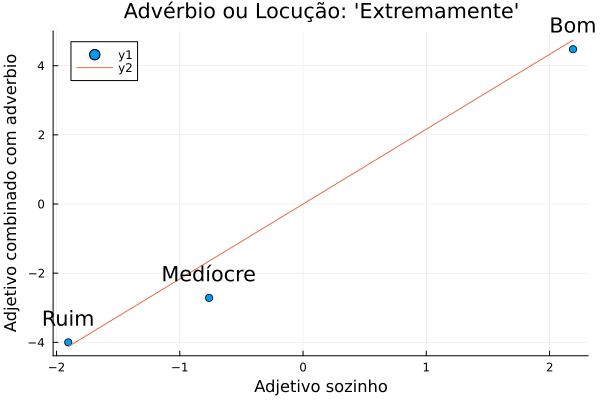

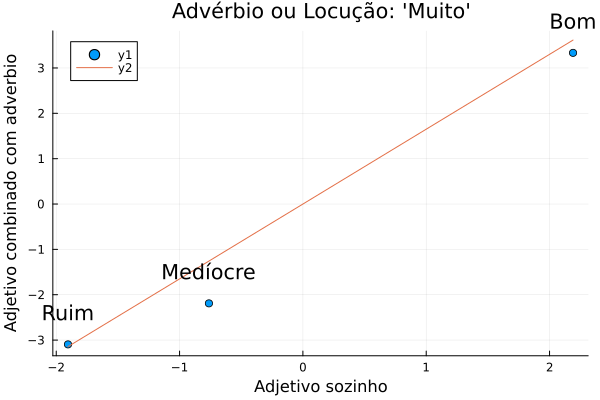

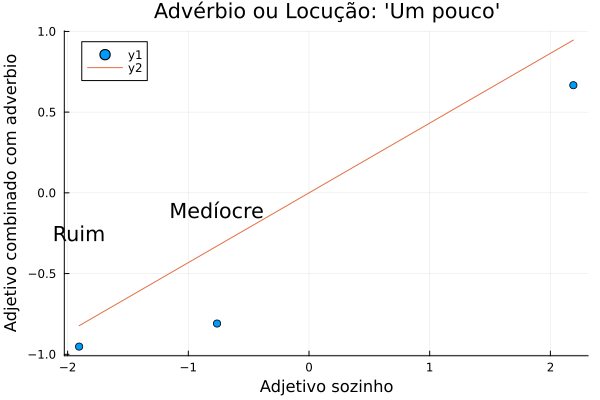

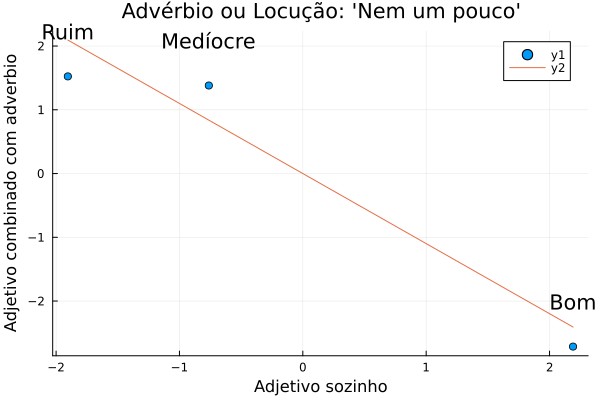

Matriz C:

5-element Vector{Float64}:
  2.164149043303122
  1.6505538771399797
  1.0
  0.43202416918429
 -1.0991943605236658

In [10]:
# Labels para plotagem e construção dos gráficos
adverbios = ["Extremamente","Muito","Um pouco","Nem um pouco"]
adjetivos = ["Ruim","Mediocre","Bom"]


            # MODELAGEM MAIS SIMPLES: Ci*Sj = Xij

# Receberá os coeficientes das regressões
coef = ones(5,2)
#Vetores representando valores de adjetivos combinados com um adverbio (linhas da matriz)
vetores_adv = Dict()
# Linha dos adjetivos sozinhos
adj_sozinho = A[3,:]

#Calculando coeficientes a partir dos adjetivos sozinhos
coef[:,1] = adj_sozinho\(A')
i=1
for adv in adverbios
    if i==3   i=4 end
    #Construindo dicionario 
    vetores_adv[adv] = A[i,:]
    
    p = scatter(A[3,:],vetores_adv[adv])
    annotate!(A[3,:],vetores_adv[adv]+[0.7,0.7,0.7],["Ruim","Medíocre","Bom"])
    plot!(title="Advérbio ou Locução: '"*adv*'\'')
    plot!(xlabel="Adjetivo sozinho")
    plot!(ylabel="Adjetivo combinado com adverbio")
    #plotando regressão linear
    plot!(adj_sozinho,(coef[i,:][1]*adj_sozinho))
    i+=1
        display(p)
     
end 
        
print("Matriz C:")
#Aqui estou usando só a primeira coluna de coef. A outra coluna, de 1s, está inclusa experimentalmente para testes, mas não é utilizada
display(coef[:,1])

In [23]:
#Pequenas explorações sobre mensuração de erros 
s = coef\A
i= 1

print("Matriz dos coeficientes adverbiais")
display(coef[:,1])

print("Matriz dos coeficientes dos adjetivos")
display(s)
print("Erros")
display(norm(A-(coef[:,1]*adj_sozinho')))


Matriz dos coeficientes adverbiais

5-element Vector{Float64}:
  2.164149043303122
  1.6505538771399797
  1.0
  0.43202416918429
 -1.0991943605236658

Matriz dos coeficientes dos adjetivos

2×3 Matrix{Float64}:
 -1.692     -1.24053      2.20901
 -0.282189   0.00997864  -0.241911

Erros

1.7922151844237675

Matriz C:

5×2 Matrix{Float64}:
  2.21326   1.15164
  1.69196   1.13793
  1.0       0.0461485
  0.449104  0.939724
 -1.13818   0.638086

Matriz S:

2×3 Matrix{Float64}:
 -1.64238  -1.12833    2.19867
 -0.3104   -0.198293  -0.338884

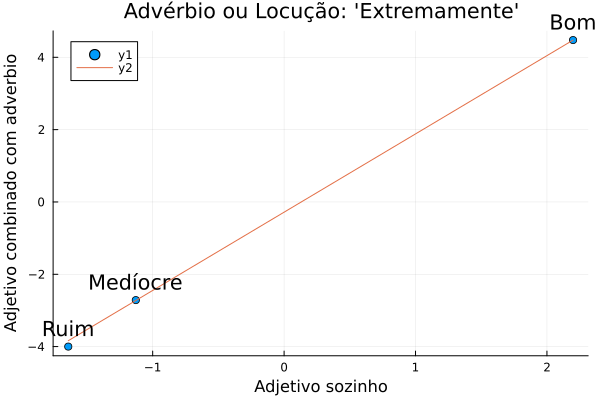

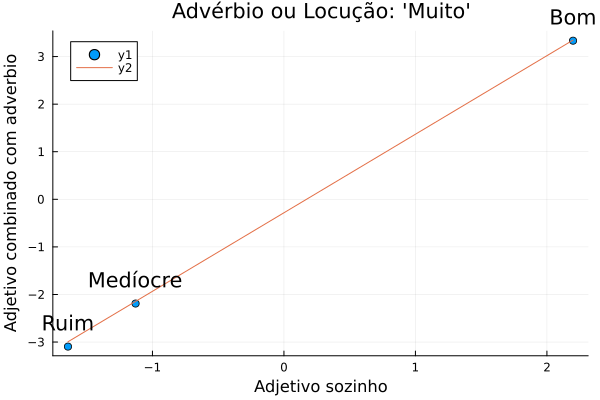

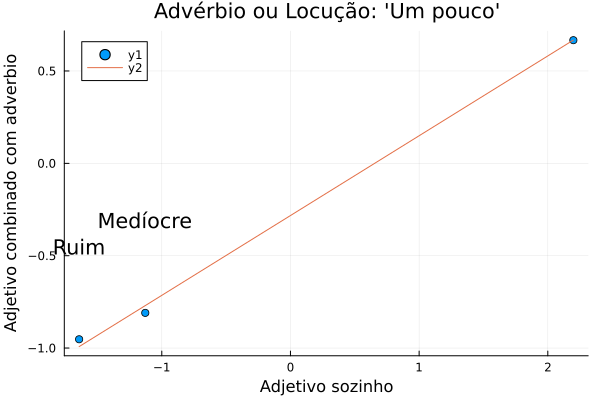

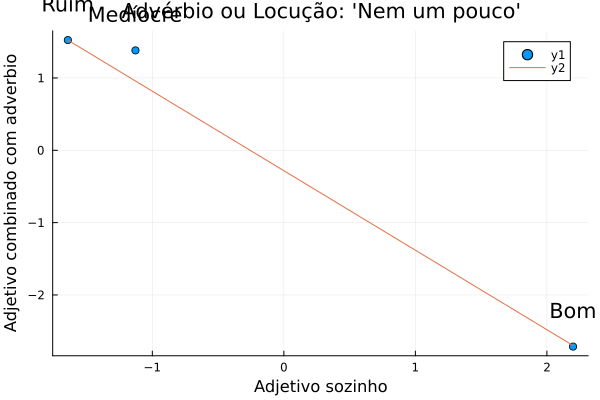

In [12]:
# Modelagem principal do artigo, a partir de aproximações P e Q de posto 2.
U,S,V  = svd(A)
P = U[:,1:2]*diagm([S[1],S[2]])
Q = V'[1:2,:]

#Definindo segunda coluna de T
tc2 = P\(ones(5,1))

#Definindo primeira coluna de T, dado que a linha 3 é a linha de Ci para os adjetivos sozinhos
Ps = [P[3,1] P[3,2]]
tc1 = Ps\[1]

#Construindo T,T⁻¹,C e S
T = hcat(tc1,tc2)
Ti = inv(T)
C = P*T
S = Ti*Q
print("Matriz C:")
display(C)
print("Matriz S:")
display(S)

#Definindo pontos para uma regressão linear a partir dos valores de S
pontos = ones(3,2)
pontos[:,1] = S[1,:]

i=1
for adv in adverbios
    if i==3 i=4 end
    #Vetor para regressao linear com média do intercepto K
    media = mean(S[2,:])
    vetor = [coef[i,:][1];media]
    
    p = scatter(S[1,:],vetores_adv[adv])
    annotate!(S[1,:],vetores_adv[adv]+[0.5,0.5,0.5],["Ruim","Medíocre","Bom"])
    plot!(title="Advérbio ou Locução: '"*adv*'\'')
    plot!(xlabel="Adjetivo sozinho")
    plot!(ylabel="Adjetivo combinado com adverbio")
    #Plotando regressão linear com interceptos aproximados
    plot!(S[1,:],(vetor'*pontos')')
    display(p)
    
    i+=1
end




In [19]:
#algumas matrizes de correlações
display(cor(A))
cor(A')

3×3 Matrix{Float64}:
  1.0        0.984889  -0.997737
  0.984889   1.0       -0.975445
 -0.997737  -0.975445   1.0

5×5 Matrix{Float64}:
  1.0        0.999941   0.991219   0.998114  -0.993789
  0.999941   1.0        0.989729   0.99872   -0.994936
  0.991219   0.989729   1.0        0.981232  -0.970347
  0.998114   0.99872    0.981232   1.0       -0.998746
 -0.993789  -0.994936  -0.970347  -0.998746   1.0